In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [4]:
# Define the stock symbol and date range
stock_symbol = 'AAPL'
start_date = '2010-01-01'
end_date = '2021-01-01'


In [5]:
# Fetch historical stock price data
df = yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [6]:
# Extract the 'Close' prices
prices = df['Close'].values.reshape(-1, 1)

In [7]:
# Normalize the data
scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices)

In [8]:
# Split the data into training and testing sets
train_size = int(len(prices_scaled) * 0.8)
train_data = prices_scaled[:train_size]
test_data = prices_scaled[train_size:]

In [9]:
# Create sequences for the LSTM model
def create_sequences(df, seq_length):
    X, y = [], []
    for i in range(len(df) - seq_length):
        X.append(df[i:i+seq_length])
        y.append(df[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [10]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
69/69 [==============================] - 2s 5ms/step - loss: 0.0047
Epoch 2/50
69/69 [==============================] - 0s 5ms/step - loss: 3.4544e-05
Epoch 3/50
69/69 [==============================] - 0s 5ms/step - loss: 2.9144e-05
Epoch 4/50
69/69 [==============================] - 0s 4ms/step - loss: 3.0487e-05
Epoch 5/50
69/69 [==============================] - 0s 4ms/step - loss: 2.9440e-05
Epoch 6/50
69/69 [==============================] - 0s 5ms/step - loss: 2.8123e-05
Epoch 7/50
69/69 [==============================] - 0s 5ms/step - loss: 3.1437e-05
Epoch 8/50
69/69 [==============================] - 0s 4ms/step - loss: 2.7297e-05
Epoch 9/50
69/69 [==============================] - 0s 5ms/step - loss: 3.1082e-05
Epoch 10/50
69/69 [==============================] - 0s 4ms/step - loss: 2.6826e-05
Epoch 11/50
69/69 [==============================] - 0s 4ms/step - loss: 2.6620e-05
Epoch 12/50
69/69 [==============================] - 0s 5ms/step - loss: 2.7771e-05
Epoch

In [12]:
# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Training Loss: {train_loss:.4f}')
print(f'Testing Loss: {test_loss:.4f}')

Training Loss: 0.0000
Testing Loss: 0.0009


In [13]:
# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform the predictions to get actual prices
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

17/17 [==============================] - 0s 7ms/step


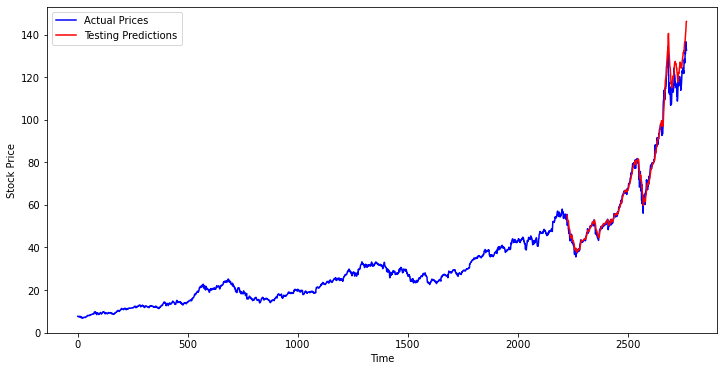

In [14]:
# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(prices, label='Actual Prices', color='blue')
plt.plot(range(len(prices) - len(test_predictions), len(prices)), test_predictions, label='Testing Predictions', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()